In [2]:
# on importe les librairies importantes
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Résolution Lab 2 - Partie 1

## 1. Définition des fonctions importantes et détermination de la valeur de L

### 1.1 Les différentes matrices de tracé de rayons

In [3]:
def Mlens(f):
    '''
        Retourne la matrice de tracé de rayon pour une lentille 
        mince ayant une longueur focale f
    '''
    M = np.array([[1, 0],
                  [-1/f, 1]])
    return M

def Mtrans(d):
    '''
        Retourne la matrice de tracé de rayon pour une translation
        d'une distance d 
    '''
    M = np.array([[1, d],
                  [0, 1]])
    return M

### 1.2 Fonction pour créer la matrice du système optique 

Voici les 7 étapes du système de caméra: 
1. Translation de $L_{obj}$ ($x$ est notre inconue à trouver)
2. Lentille mince convergente de longueur focale $f_1=150$ mm
3. Translation de $L_2$
4. Lentille divergente de longueur focale $f_2=-75$ mm
5. Translation de $L_3$
6. Lentille mince convergente de longueur focale $f_3=75$ mm
7. Translation de $L_{im}$


In [114]:
def system_matrix(s1, s2, s3, Lobj, f1=150, f2=-75, f3=75): # [mm]
    '''
        Retourne la matrice de tracé de rayon 2x2 d'une caméra simple
    '''
    Mtot = Mtrans(s3)@Mlens(f3)@Mtrans(s2)@Mlens(f2)@Mtrans(s1)@Mlens(f1)@Mtrans(Lobj)
    return Mtot

### 1.3 Test du cas extrême de L

In [41]:
# Pour le cas extrême où L = 100mm, on a que s1 = 0mm. Donc, la lentille f1 est collée à la lentille f2.
s1 = 0 # [mm]
L = 100 # [mm]
Lobj = 1000 # [mm]
s2 = sp.symbols('s2')
s3 = L-s1-s2
# on trouve la matrice de tracé de rayon pour le plan image en orange
Msys = system_matrix(s1, s2, s3, Lobj)
# On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
# On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
B = Msys[0, 1] 
# On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
s2_solve = sp.solve(B)

print(s2_solve)
# On peut voir que les solutions pour s2 sont soit négatives ou complexes, ce qui sont des résultats
# illogiques voyant que s2 est la distance entre la lentille f2 et la lentille f3. On peut expliquer
# ce résultat par le fait qu'il semble ne pas exister de valeurs possibles pour s2 qui permettent
# d'avoir B=0. Il faut donc augmenter la valeur de L pour permettre d'obtenir des solutions logiques.

[-15.2173913043478 - 63.305303385048*I, -15.2173913043478 + 63.305303385048*I]


### 1.4 Augmentons la valeur de L pour obtenir des solutions physiques

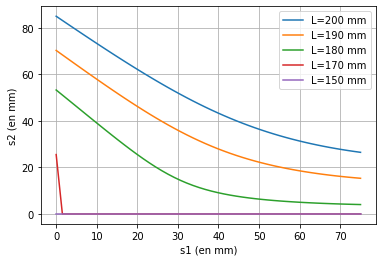

In [47]:
# Augmentons la valeur de L.
L = [200, 190, 180, 170, 150] # [mm]
Lobj = 1000 # [mm]
s1 = np.linspace(0, 75, 50) # [mm]
s2 = sp.symbols('s2')

for Lval in L:
    slns = []
    for s1_val in s1:
        # On trouve la matrice de tracé de rayon 
        s3 = Lval-s1_val-s2
        Msys = system_matrix(s1_val, s2, s3, Lobj)
        # On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
        # On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
        B = Msys[0, 1] 
        # print(type(B))
        # print(sp.solve(B)[0])
        slns.append(sp.solve(B)[-1]) # On garde que la solution positive
        # print(slns)
    slns = np.complex_(slns)
    for i in range(len(slns)):
        if  slns[i].imag != 0.0 or slns[i].real<0:
            slns[i] = 0 
    slns = slns.real
    plt.plot(s1, slns, label=f'L={Lval} mm')

plt.legend()
plt.xlabel("s1 (en mm)")
plt.ylabel("s2 (en mm)")
plt.grid()

Allons avec L=190mm, car elle semble être la valeur la plus petite de $L$ qui fait que $s2$ est positif et réel pour les valeurs de $s1$ considérées et des valeurs plus grandes aussi.

# 2. Graphiques

### 2.1 Graphique 1: Grossissement vs position de la lentille L2 .

g_min  0.0778391094508551 

g_max  0.164612180101680 

Facteur de grossissement  2.11477470982129 



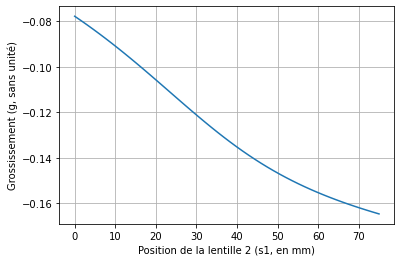

In [118]:
L = 190 # [mm]
Lobj = 1000 # [mm]
s1 = np.linspace(0, 75, 50) # [mm]
s2 = sp.symbols('s2')
s2_slns = []
gross = []
for s1_val in s1:
    # On trouve la matrice de tracé de rayon 
    s3 = L-s1_val-s2
    Msys = system_matrix(s1_val, s2, s3, Lobj)
    # On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
    # On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
    A = Msys[0, 0]
    B = Msys[0, 1] 
    s2_solve = sp.solve(B, s2)[-1]
    s2_slns.append(s2_solve)
    gross.append(A.evalf(subs={'s2':s2_solve})) # On garde que la solution positive

gross_min = min(np.abs(gross))
gross_max = max(np.abs(gross))
print("g_min ", gross_min, "\n")
print("g_max ", gross_max, "\n")

fact_gross = gross_max/gross_min
print("Facteur de grossissement ", fact_gross, "\n")

plt.plot(s1, gross)
plt.xlabel("Position de la lentille 2 (s1, en mm)")
plt.ylabel("Grossissement (g, sans unité)")
plt.grid()
# Le grossissement est négatif et il est plus petit que 1 en valeur absolue, ce qui 
# est exactement ce qu'on veut 
# Nic -> :)

In [117]:
print(gross)

[-0.0778391094508551, -0.0797058098583031, -0.0816216290102258, -0.0835863201338303, -0.0855993228293189, -0.0876597176046570, -0.0897661784449776, -0.0919169246351034, -0.0941096735237903, -0.0963415964478262, -0.0986092805928226, -0.100908700105260, -0.103235200212733, -0.105583498357909, -0.107947706292188, -0.110321376588871, -0.112697576027253, -0.115068986725859, -0.117428033809792, -0.119767035943143, -0.122078372519004, -0.124354659045345, -0.126588920691276, -0.128774753401326, -0.130906462631720, -0.132979171584765, -0.134988893565083, -0.136932566332928, -0.138808049589070, -0.140614089536297, -0.142350256498955, -0.144016862697317, -0.145614867496247, -0.147145776937384, -0.148611543351284, -0.150014469571387, -0.151357120943763, -0.152642247097413, -0.153872714401416, -0.155051449226234, -0.156181391546563, -0.157265458047530, -0.158306513687467, -0.159307350589337, -0.160270673141682, -0.161199088257586, -0.162095099841895, -0.162961106634556, -0.163799402719100, -0.16461

In [121]:
print("Le grossissement maximal est ", gross_max, "mm")
print("La position s1 donnant le grossissement maximal est ", s1[-1], "mm")
print("La position s2 donnant le grossissement maximal est ", s2_slns[-1], "mm")
print("La position s3 donnant le grossissement maximal est ", L-s1[-1]-s2_slns[-1], "mm")
print("Le grossissement minimal est ", gross_min, "mm")
print("La position s1 donnant le grossissement minimal est ", s1[0], "mm")
print("La position s2 donnant le grossissement minimal est ", s2_slns[0], "mm")
print("La position s3 donnant le grossissement minimal est ", L-s1[0]-s2_slns[0], "mm")

Le grossissement maximal est  0.164612180101680 mm
La position s1 donnant le grossissement maximal est  75.0 mm
La position s2 donnant le grossissement maximal est  15.3081729847480 mm
La position s3 donnant le grossissement maximal est  99.6918270152520 mm
Le grossissement minimal est  0.0778391094508551 mm
La position s1 donnant le grossissement minimal est  0.0 mm
La position s2 donnant le grossissement minimal est  70.2425120657584 mm
La position s3 donnant le grossissement minimal est  119.757487934242 mm


### 2.2 Graphique 2: Résolution vs position de la lentille L2

De manière générale, la résolution est définie comme la distance minimale pour distinguer deux éléments de n'importe quoi. Ici, la résolution est définie comme la distance minimale entre deux points dans le plan objet qui de manière à ce que ces deux points soient imagés sur deux pixels différents dans le plan image.

Le développement fait précédemment était fait en allant du plan objet au plan image. Si on voulait aller du plan image au plan objet, on pourrait refaire tout le développement ou on peut réaliser que c'est tout simplement le chemin inverse de ce qu'on vient juste de faire. On peut donc facilement déterminer la taille d'un pixel dans le plan objet en divisant la taille d'un pixel, soit $3,6 \mu$ m $\times$  $3,6 \mu m$, par le grossissement trouvé précédemment pour chaque valeur de $s2$. 



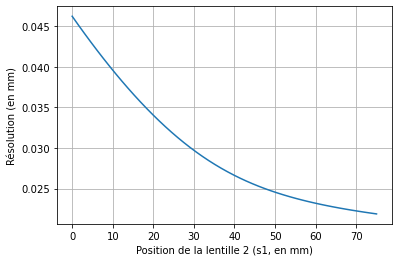

In [52]:
taille_pixel = 3.6e-3 # [mm]
res = []
for element in g:
    # J'ai pris la valeur absolue, car je ne vois pas
    res.append(np.abs(taille_pixel/element)) 
plt.plot(s1, res)
plt.xlabel("Position de la lentille 2 (s1, en mm)")
plt.ylabel("Résolution (en mm)")
plt.grid()

### 2.3 Graphique 3: Profondeur de champ vs position de la lentille L2

Même chose que pour le pré-lab 1, mais on utilise $d_{pixel}$ au lieu de $d_{steno}$

Ici, notre but est de résoudre pour la valeur de $s_3 = L-s_1-s_2$

In [74]:


# Fonction pour calculer la profondeur de champ (PdC)
def PdC(s1, L, s3_orange, s3_rose):
    # on trouve la matrice de tracé de rayon pour le plan image en orange
    Lobj = sp.symbols('Lobj')
    
    Msys = system_matrix(s1, L-s1-s3_orange, s3_orange, Lobj)
    # On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
    # On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
    B = Msys[0, 1] 
    # On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
    x1 = sp.solve(B)[0]

    # On trouve la matrice de tracé de rayon pour le plan image en rose.
    Lobj = sp.symbols('Lobj')
    Msys = system_matrix(s1, L-s1-s3_rose, s3_rose, Lobj)
    # Même chose que pour le plan image en orange.
    B = Msys[0, 1]
    # On résoud le système formé de l'élément (0,1) de la matrice de tracé de rayon égal à 0.
    x2 = sp.solve(B)[0]
    # On calcule la résolution axiale.
    dof = np.abs(x2-x1)
    return dof

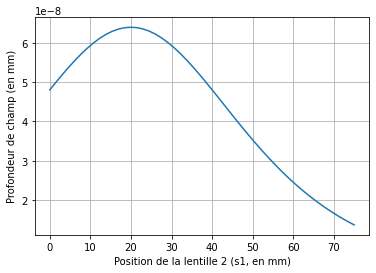

In [76]:
# Calcul Retourne la position des plans images (orange et rose), qui se retrouvent
# à droite de la lentille à droite
f3 = 150 # [mm]  
d = 3.6e-3 # [mm] 
D = 25.4 # [mm] 
s3_orange = f3 - (d*f3)/(D-d) # Position du plan image en orange en [mm] 
s3_rose = f3 + (d*f3)/(D-d) # Position du plan image en rose en [mm] 

L = 190 # [mm]
s1 = np.linspace(0, 75, 50) # [mm] 
PdC_vals = []
# Calcul de la profondeur de champ pour chaque valeur de s1
for s1_val in s1: 
    PdC_vals.append(PdC(s1_val, L, s3_orange, s3_rose))

plt.plot(s1, PdC_vals)
plt.xlabel("Position de la lentille 2 (s1, en mm)")
plt.ylabel("Profondeur de champ (en mm)")
plt.grid()

# 3. Calcul de la position des lentilles pour un objet provenant de $\infty$

Pour simuler l'image d'un objet provenant de l'infini, il est possible d'ajouter une lentille convergente


Voici les 7 étapes du système de caméra: 
1. Translation de $L_{obj}$ ($x$ est notre inconue à trouver)
2. Lentille mince convergente de longueur focale $f_1=150$ mm
3. Translation de $L_2$
4. Lentille divergente de longueur focale $f_2=-75$ mm
5. Translation de $L_3$
6. Lentille mince convergente de longueur focale $f_3=75$ mm
7. Translation de $L_{im}$


In [116]:
def system_matrix2(s1, s2, s3, f1=150, f2=-75, f3=75): # [mm]
    '''
        Retourne la matrice de tracé de rayon 2x2 du système de microscopie confocale
        Celle-ci contient l'inconnu 'x' comme variable symbolique
    '''
    Mtot = Mtrans(s3)@Mlens(f3)@Mtrans(s2)@Mlens(f2)@Mtrans(s1)@Mlens(f1)
    return Mtot

g_min  0.231112036651395 

g_max  0.266666666666667 

Facteur de grossissement  1.15384153300895 



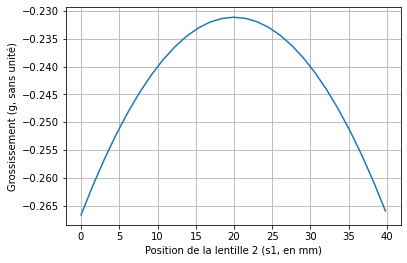

In [104]:
L = 190 # [mm]
s1 = np.linspace(0, 75, 50) # [mm]
# s2 = sp.symbols('s2')
s_3 = f_eq
s1_graph = []
s2_slns = []
g = []
for s1_val in s1:
    # On trouve la matrice de tracé de rayon 
    s3 = L-s1_val-s2
    Msys = system_matrix(s1_val, s2, s3)
    # On est dans le cas où le rayon incident et le rayon transmis convergent chancun en un point.
    # On est donc dans le cas où le coefficient B de la matrice [[A B], [C,D]] vaut 0.
    A = Msys[0, 0]
    # B = Msys[0, 1] 
    s2_solve = L-s1_val-s_3
    if s2_solve >0:
        s1_graph.append(s1_val)
        s2_slns.append(s2_solve)
        g.append(A.evalf(subs={'s2':s2_solve})) 

g_min = min(np.abs(g))
g_max = max(np.abs(g))
print("g_min ", g_min, "\n")
print("g_max ", g_max, "\n")

fact_gross = g_max/g_min
print("Facteur de grossissement ", fact_gross, "\n")

plt.plot(s1_graph, g)
plt.xlabel("Position de la lentille 2 (s1, en mm)")
plt.ylabel("Grossissement (g, sans unité)")
plt.grid()

In [106]:
print(g)

[-0.266666666666667, -0.261432736359850, -0.256615299180897, -0.252214355129807, -0.248229904206581, -0.244661946411218, -0.241510481743718, -0.238775510204082, -0.236457031792309, -0.234555046508399, -0.233069554352353, -0.232000555324171, -0.231348049423851, -0.231112036651395, -0.231292517006803, -0.231889490490074, -0.232902957101208, -0.234332916840206, -0.236179369707067, -0.238442315701791, -0.241121754824379, -0.244217687074830, -0.247730112453145, -0.251659030959323, -0.256004442593364, -0.260766347355269, -0.265944745245037]


In [108]:
print("Position de la lentille 2 donnant le grossissement minimal ",s1_graph[0],"mm \n")
print("Valeur du grossissement minimal en valeur absolue",np.abs(g[0]),"\n")
print("Position de la lentille 2 donnant le grossissement minimal",s1_graph[13],"mm \n")
print("Valeur du grossissement maximal en valeur absolue ",np.abs(g[13]),"\n")

Position de la lentille 2 donnant le grossissement minimal  0.0 mm 

Valeur du grossissement minimal en valeur absolue 0.266666666666667 

Position de la lentille 2 donnant le grossissement minimal 19.897959183673468 mm 

Valeur du grossissement maximal en valeur absolue  0.231112036651395 



In [109]:
print("Position de la lentille 3 donnant le grossissement minimal ",s2_slns[0],"mm \n")
print("Position de la lentille 3 donnant le grossissement maximal",s2_slns[13],"mm \n")

Position de la lentille 3 donnant le grossissement minimal  40.0 mm 

Position de la lentille 3 donnant le grossissement maximal 20.102040816326536 mm 



In [102]:
print(s2_slns)

[40.0, 38.46938775510205, 36.938775510204096, 35.408163265306115, 33.87755102040816, 32.34693877551021, 30.81632653061226, 29.285714285714278, 27.755102040816325, 26.224489795918373, 24.69387755102042, 23.16326530612244, 21.632653061224488, 20.102040816326536, 18.571428571428584, 17.040816326530603, 15.51020408163265, 13.979591836734699, 12.448979591836746, 10.918367346938766, 9.387755102040813, 7.857142857142861, 6.326530612244909, 4.795918367346928, 3.265306122448976, 1.7346938775510239, 0.20408163265307167, -1.3265306122448806, -2.857142857142861, -4.387755102040813, -5.918367346938766, -7.448979591836746, -8.979591836734699, -10.51020408163265, -12.040816326530603, -13.571428571428555, -15.102040816326536, -16.632653061224488, -18.16326530612244, -19.69387755102042, -21.224489795918373, -22.755102040816325, -24.285714285714278, -25.816326530612244, -27.346938775510196, -28.877551020408163, -30.408163265306115, -31.93877551020408, -33.469387755102034, -35.0]
